In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X


array([[-6.13094818, -0.30705285],
       [-5.70864091, -0.80392917],
       [ 6.29642315, -0.01025541],
       ...,
       [-6.03051595, -0.35885534],
       [ 6.51372102,  2.35958699],
       [ 8.40262512,  2.17869167]])

In [4]:
y

array([1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2,
       0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0,
       1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0,
       2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 0,
       2, 0, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       2, 0, 1, 2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 2,
       2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2,
       0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2,
       0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2,
       0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0,
       1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0,

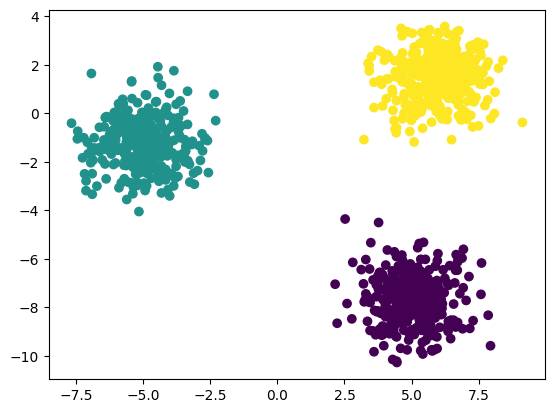

In [6]:
plt.scatter(X[:, 0], X[:, 1],c=y)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans


In [11]:
## elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1340.0000000000007,
 669.0181983865846,
 69.96479433627027,
 60.21495212518281,
 50.721440526471575,
 40.87074534506993,
 37.787656536719865,
 40.78063491862863,
 30.764823178758185,
 28.126683388212047]

Text(0.5, 1.0, 'Elbow Method')

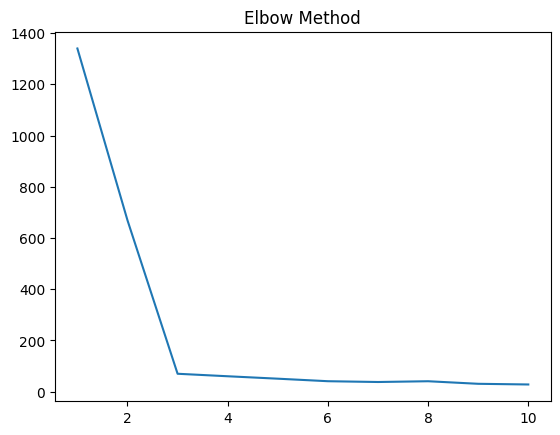

In [13]:
## plot elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [15]:
kmeans.fit_predict(X_train)

array([0, 2, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1,
       1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2,
       0, 1, 0, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1,
       2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2,
       1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       0, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 1,
       2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2,
       2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2,

In [16]:
y_pred = kmeans.predict(X_test)

In [17]:
y_pred

array([0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1,
       1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1,
       0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0,
       2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2,
       1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0,
       1, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 1, 2, 0, 2, 2,
       1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 1, 0,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1,
       0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2,

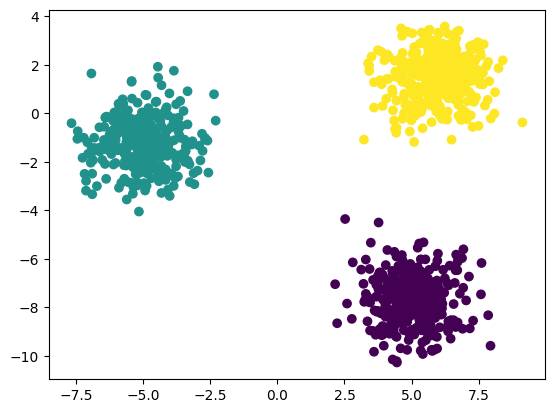

In [19]:
plt.scatter(X[:,0],X[:,1],c=y)